#1. Popularity Based Recommendation System

In [93]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [94]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [95]:
import pandas as pd
import numpy as np
import os 


### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [96]:
os.chdir('/content/gdrive/MyDrive')
joke1=pd.read_csv('jokes.csv')
joke1.head(200)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,100,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,1.17,7.38,1.21,-0.58,1.02,-0.15,-2.43,2.86,0.78,2.96,3.93,0.44,0.78,-1.75,0.29,1.75,6.89,3.40,3.35,0.53,6.41,5.68,3.93,-0.10,6.55,6.41,0.29,6.55,2.67,...,5.44,5.78,7.57,-1.70,4.81,6.46,-0.15,7.04,7.52,0.87,-0.19,3.88,0.05,0.97,-0.34,4.61,0.10,0.49,-2.62,-0.49,-2.96,5.44,5.73,2.43,2.14,3.98,4.66,-2.14,4.08,1.46,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,71,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,-0.15,4.71,-7.18,-0.68,-0.34,-5.68,-1.36,1.84,4.51,-0.19,4.81,4.51,4.56,-0.10,6.46,-0.10,7.04,-0.10,3.98,1.70,-0.97,2.48,1.12,6.36,4.22,-0.15,-0.73,-2.57,4.66,...,1.89,2.52,4.27,-0.15,3.45,8.30,5.87,4.71,6.21,5.68,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,5.73,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
197,100,2.6

In [97]:
joke1.shape

(24983, 101)

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [98]:
os.chdir('/content/gdrive/MyDrive')
ratings=joke1.iloc[:200,1:]

In [99]:
mean_ratings=ratings.mean(axis=0)

### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [100]:
ratings=ratings.replace(99,0)

In [101]:
mean_ratings.head()

Joke1    29.73505
Joke2    18.90890
Joke3    34.88765
Joke4    45.33400
Joke5    -0.03790
dtype: float64

### Q5. List most popular 10 jokes

In [102]:
mean_ratings.sort_values(0,ascending=False).head(10)

Joke89    68.26785
Joke75    68.16485
Joke77    68.03305
Joke76    67.99045
Joke72    67.94600
Joke80    67.89735
Joke73    67.68100
Joke79    67.09945
Joke78    67.05365
Joke74    66.91115
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [103]:
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [104]:
books.shape

(271360, 8)

In [105]:
print(books)

              ISBN  ...                                          imageUrlL
0       0195153448  ...  http://images.amazon.com/images/P/0195153448.0...
1       0002005018  ...  http://images.amazon.com/images/P/0002005018.0...
2       0060973129  ...  http://images.amazon.com/images/P/0060973129.0...
3       0374157065  ...  http://images.amazon.com/images/P/0374157065.0...
4       0393045218  ...  http://images.amazon.com/images/P/0393045218.0...
...            ...  ...                                                ...
271355  0440400988  ...  http://images.amazon.com/images/P/0440400988.0...
271356  0525447644  ...  http://images.amazon.com/images/P/0525447644.0...
271357  006008667X  ...  http://images.amazon.com/images/P/006008667X.0...
271358  0192126040  ...  http://images.amazon.com/images/P/0192126040.0...
271359  0767409752  ...  http://images.amazon.com/images/P/0767409752.0...

[271360 rows x 8 columns]


In [106]:
users.shape


(278858, 3)

In [107]:
print(users)

        userID                            Location   Age
0            1                  nyc, new york, usa   NaN
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia   NaN
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom   NaN
...        ...                                 ...   ...
278853  278854               portland, oregon, usa   NaN
278854  278855  tacoma, washington, united kingdom  50.0
278855  278856           brampton, ontario, canada   NaN
278856  278857           knoxville, tennessee, usa   NaN
278857  278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]


In [108]:
ratings.shape

(1149780, 3)

In [109]:
print(ratings)

         userID         ISBN  bookRating
0        276725   034545104X           0
1        276726   0155061224           5
2        276727   0446520802           0
3        276729   052165615X           3
4        276729   0521795028           6
...         ...          ...         ...
1149775  276704   1563526298           9
1149776  276706   0679447156           0
1149777  276709   0515107662          10
1149778  276721   0590442449          10
1149779  276723  05162443314           8

[1149780 rows x 3 columns]


In [110]:
print(books.columns)
print(users.columns)
print(ratings.columns)

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Index(['userID', 'Location', 'Age'], dtype='object')
Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [111]:
books.drop(books.columns[-3:],axis=1,inplace=True)

In [112]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [113]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [114]:
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]

In [115]:
ratings_new=ratings_new[ratings_new.userID.isin(users.userID)]

In [116]:
ratings_new.shape

(1031136, 3)

# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [117]:
ratings_new['bookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [118]:
ratings_new=ratings_new[ratings_new['bookRating']!=0]
ratings_new.shape

(383842, 3)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


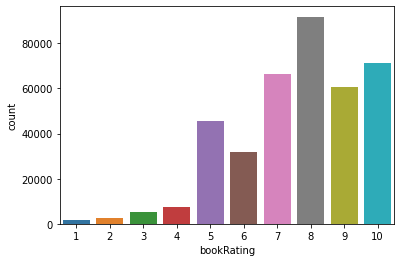

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(ratings_new['bookRating'])

In [120]:
ratings_new['bookRating'].value_counts()

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [122]:
ratings_100 = ratings_new.groupby(['userID'])[['userID']].count()

In [123]:
ratings_100

,userID
userID,
8,7
9,1
12,1
14,3
16,1
...,...
278846,1
278849,1
278851,14


In [124]:
ratings_100.drop(ratings_100[ratings_100['userID']<100].index,inplace=True)

In [129]:
ratings_100['userID'].nunique

<bound method IndexOpsMixin.nunique of userID
2033      129
2110      103
2276      196
4017      154
4385      212
         ... 
274061    211
274301    161
275970    142
277427    146
278418    106
Name: userID, Length: 449, dtype: int64>

In [131]:
counts1=pd.value_counts(ratings_new['userID'])
ratings_new = ratings_new[ratings_new['userID'].isin(counts1[counts1 >= 100].index)]

In [134]:
ratings_new.shape

(103271, 3)

In [135]:
ratings_new.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [132]:
!pip install scikit-surprise


     |████████████████████████████████| 11.8MB 5.4MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670921 sha256=f7cefafd9d2547503181e154e5e8e7417bc4676bd9d670ee363241cd4485331e
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [133]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [139]:
data = Dataset.load_from_df(ratings_new[['userID', 'ISBN', 'bookRating']], reader)
data.df.head(4)


,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7


In [140]:
from surprise.model_selection import train_test_split
trainset, testset=train_test_split(data, test_size=0.25, random_state=123)


In [142]:
from surprise import SVD
from surprise import accuracy


In [143]:
svd_model=SVD(n_factors=50, biased=False)

In [144]:
svd_model.fit(trainset)

In [145]:
test_pred=svd_model.test(testset)
accuracy.rmse(test_pred)

RMSE: 3.2338


3.233821324124764

In [146]:
svd_model

In [147]:
test_pred

[Prediction(uid=30810, iid='357000077X', r_ui=9.0, est=7.831549455799001, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid=227520, iid='0345387813', r_ui=7.0, est=1, details={'was_impossible': False}),
 Prediction(uid=31826, iid='0439207843', r_ui=10.0, est=7.831549455799001, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid=110934, iid='0452273374', r_ui=9.0, est=3.9963291452577616, details={'was_impossible': False}),
 Prediction(uid=197659, iid='0060192240', r_ui=9.0, est=1.6144725080006566, details={'was_impossible': False}),
 Prediction(uid=278418, iid='0871318156', r_ui=8.0, est=7.831549455799001, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid=239594, iid='0446679194', r_ui=8.0, est=7.831549455799001, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid=123094, iid='0345337662', r_ui=9.0, est=5.685697049448606, details

# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [149]:
from collections import defaultdict

def get_top_n_user(predictions,user_ID,n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n[user_ID]


In [150]:
get_top_n_user(test_pred,153662,15)


[('0380776839', 10),
 ('0425189031', 9.539369170270366),
 ('0671670069', 9.00151726115313),
 ('0671795538', 8.94617489014194),
 ('0380756293', 8.858616885601982),
 ('0380753014', 8.825305685625807),
 ('0553575023', 8.632192894548691),
 ('0553289322', 8.59626008629877),
 ('014028009X', 8.57654226579538),
 ('0425171078', 8.559763797370225),
 ('0671870114', 8.510380537062122),
 ('0515114006', 8.387327814716423),
 ('067173976X', 8.274320769426549),
 ('0449005852', 8.183399329853975),
 ('0373483503', 8.168129241631178)]

In [152]:
books[books['ISBN']=='0553294903']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
31920,0553294903,Divine Evil,NORA ROBERTS,1992,Bantam
